<a href="https://colab.research.google.com/github/Enric-dot/Music_scratcher/blob/main/ScrappingMusica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La paina ue vamos a scrappear sera genius

IMPORTS

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

PAGINA https://genius.com/artists

In [ ]:
HEAD = "https://www.letras.com/"

In [ ]:
def getUrl():
  '''
  User interface to ask for the artist and get the url
  params --> None
  return --> str Url
  '''
  artist=input("Introuce el nombre del artista")
  return HEAD + artist

In [ ]:
def getPg(url: str):
  '''
  Makes a request from Url
  params --> str Url
  return --> BeautifulSoup soup
  '''
  pg = requests.get(url)
  soup = BeautifulSoup(pg.content, 'html.parser')
  return soup


In [ ]:
def getLyricsUrls(soup: BeautifulSoup, url:str):
  '''
  List of lyric url
  params --> BeautifulSoup soup
  return --> list lst
  '''
  lst = soup.find_all("a", {"class": "song-name"})
  lst = [url+'/'+l.getText().replace(' ','-') for l in lst]
  return lst



In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.c6faz6z4C5/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.rFx36ByQrg/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.Hl63b38C7p/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 https://cloud.r-project.org/bin/l

In [ ]:
from selenium import webdriver

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
browser = webdriver.Chrome('chromedriver',chrome_options=options)
#browser = webdriver.Firefox(executable_path=GeckoDriverManager().install())

<ipython-input-9-6528ee7bb17f>:1: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome('chromedriver',chrome_options=options)


In [ ]:
historic={}

In [ ]:
def create_dataset(data_set, lst, w = [-2,-1,1,2]):
  for i in range(len(lst)):
    for j in w:
      try:
        if lst[i] not in [''] and lst[i+j] not in ['']:
          data_set[lst[i]].add(lst[i+j])

      except Exception as e:
        #print(e.args)
        continue
  return data_set


In [ ]:
def getLyrics(lst : list):
  '''
  List of lyric
  params --> list lst
  return --> None
  '''
  data_set={}
  for web in lst:
    browser.get(web)
    pg = browser.page_source
    soup = BeautifulSoup(pg, 'html.parser')
    parrafs = [str(p) for p in soup.find_all("p")]
    parrafs="".join(parrafs)
    parrafs=parrafs.replace("<br/>"," ")
    parrafs=parrafs.replace("<p>"," ")
    parrafs=parrafs.replace(","," ")
    parrafs=parrafs.replace("</p>"," ")
    parrafs=parrafs.replace("."," ")
    parrafs=parrafs.replace("?"," ")
    parrafs=parrafs.replace("!"," ")
    parrafs=parrafs.replace("("," ")
    parrafs=parrafs.replace(")"," ")
    parrafs=parrafs.replace('"',' ' )
    parrafs=parrafs.lower()
    split = parrafs.split(" ")
    for l in split:
      if l not in ['']:
        if l in historic.keys():
          historic[l]+=1
        else:
          historic[l]=1
          data_set[l]=set()
    #print(data_set)
    data_set = create_dataset(data_set,split)
    print('Pagina: ',web,' Cancion: ',parrafs)
  return data_set


In [ ]:
url = getUrl()
print(url)
soup = getPg(url)
lst=getLyricsUrls(soup, url)
print(lst)
data_set = getLyrics(lst)

Introuce el nombre del artistamf-doom
https://www.letras.com/mf-doom
['https://www.letras.com/mf-doom/?', 'https://www.letras.com/mf-doom/Avalanche-(feat.-Madlib)', 'https://www.letras.com/mf-doom/Beef-Rapp', 'https://www.letras.com/mf-doom/Biochemical-Equation', 'https://www.letras.com/mf-doom/Blunt-Drunk-(All-Outta-Ale-Remix)', 'https://www.letras.com/mf-doom/Books-Of-War', 'https://www.letras.com/mf-doom/Dead-Bent', 'https://www.letras.com/mf-doom/Deep-Fried-Frenz', 'https://www.letras.com/mf-doom/Doomsday', 'https://www.letras.com/mf-doom/Fig-Leaf-Bi-Carbonate', 'https://www.letras.com/mf-doom/Fillet-O-Rapper', 'https://www.letras.com/mf-doom/Gas-Drawls', 'https://www.letras.com/mf-doom/Gazzillion-Ear', 'https://www.letras.com/mf-doom/Guinnesses', 'https://www.letras.com/mf-doom/Gumbo', 'https://www.letras.com/mf-doom/Hey!', 'https://www.letras.com/mf-doom/Hoe-Cakes', 'https://www.letras.com/mf-doom/I-Hear-Voices', 'https://www.letras.com/mf-doom/Is-He-Ill?', 'https://www.letras.co

In [ ]:
print(data_set)


{'no': {'entre', 'supiste', 'podemos', 'paciência', 'realidad', 'dois', 'quieren', 'alivia', 'gane', 'casualidad', 'verle', 'non', 'asusta', 'paró', 'tocarte', 'mires', 'andar', 'correcto', 'motivo', 'debes', 'entro', 'solo', 'merezco', 'frío', 'agora', 'tiene', 'voz', 'juzgado', 'inmensa', 'neve', 'rechazar', 'hermana', 'quién', 'invitación', 'segon', 'heridas', 'mucho', 'are', 'enciendas', 'intensa', 'querernos', "i've", 'noche', 'ahí', 'dejar', 'manos', 'pueden', 'gustaba', 'seguro', 'guardas', 'debería', 'sembrar', 'quieres', 'impaciente', 'mirada', 'ver', 'quisiera', 'disfraz', 'recordarte', 'llamas', 'creer', 'caminar', 'miás', 'champú', 'hartar', 'locamente', 'cuadro', 'aguanto', 'tío', 'gracia', 'salga', 'lleves', 'existes', 'cambiarás', 'final', 'silêncio', 'abandona', 'sabíem', 'darte', 'así', 'tú', 'anys', 'preocupa', 'sigo', 'moldes', 'absurda', 'ha', 'verdad', 'lamento', 'estar', 'pensando', 'vacío', 'pegue', 'despinte', 'colme', 'ninguno', 'todos', 'tenía', 'permitas', 'v

In [ ]:
words = list(historic.keys())


In [ ]:
for w in words:
  print(w,": ", len(data_set[w]))

Se han truncado las últimas 5000 líneas del flujo de salida.
imposible :  6
otros :  10
fingen :  4
déjalos :  4
mirándonos :  4
raro :  8
libres :  5
pides :  6
bueno :  36
repetir :  7
besas :  5
hecho :  19
pa'lante :  6
arrojo :  4
despeine :  4
bailo :  13
vos :  9
pronto :  12
pasó :  20
bailando :  4
mimbre :  4
bailaba :  4
cintura :  11
hiciste :  11
perderme :  20
ocasión :  8
pegado :  4
boca :  50
frescura :  4
hijo :  4
maría :  3
jesús :  3
alcalá :  4
algeciras :  3
pequeño :  12
mayor :  12
agosto :  3
diciembre :  3
18 :  3
introvertido :  4
estaba :  20
gustaba :  9
poesía :  13
flamenco :  14
bujío :  4
tuve :  18
muchos :  3
era :  55
mirarme :  4
ombligo :  7
atraía :  4
fuera :  52
metío :  3
jugaba :  8
extraño :  9
encajaba :  4
mandaban :  4
extrarradio :  4
rarito :  2
daba :  8
pizarra :  3
cualquiera :  3
hacía :  4
chiquito :  4
burlarse :  4
quería :  13
guitarra :  11
pupitre :  4
compañero :  4
vacilón :  10
relleno :  4
flaquito :  3
escuela :  8
hice :

In [ ]:
print(len(words))

5938


In [ ]:
def words2onehot(lst):
  length=len(words)
  one_hot = {}
  for w,i in zip(words,range(length)):
    v = [0] * length
    v[i]=1
    one_hot[w] = v
  return one_hot

In [ ]:
one_hot = words2onehot(words)

In [ ]:
import numpy as np


In [ ]:
def or_output(lst_out):
   t = len(one_hot[list(lst_out)[0]])
   arr = np.zeros(t)
   for i in lst_out:
     arr += np.array(one_hot[i])
   return arr

In [ ]:
def generate_in_out(hot_enc,data_set):
  input=[]
  output=[]
  try:
    for key in data_set.keys():

      output.append(or_output(data_set[key]))
      input.append(hot_enc[key])
  except:
    pass
    #for value in data_set[key]:
    #  input.append(hot_enc[key])
    #  output.append(hot_enc[value])
  return np.array(input), np.array(output)

#Hacer or para outputs
#Multi-Class Classification Loss Functions
#Multi-Class Cross-Entropy Loss
#Sparse Multiclass Cross-Entropy Loss
#Kullback Leibler Divergence Loss
#
#

In [ ]:
i,o =generate_in_out(one_hot,data_set)

In [ ]:
print(len(i),len(o))
print(type(i[0]),type(o[0]))
print(o.max())
print(o[0])
o2=o.astype(int)
print(o2[0])

2168 2168
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
1.0
[1. 1. 1. ... 0. 0. 0.]
[1 1 1 ... 0 0 0]


In [ ]:
import tensorflow as tf
#from tensorflow.python.keras.layers import InputLayer, Dense
#from tensorflow.python.keras import Sequential

In [ ]:
model = tf.keras.Sequential()
#model.add(InputLayer(input_shape=(len(words),)))
model.add(tf.keras.layers.Dense(3, activation="sigmoid", input_shape=(len(words),)))
model.add(tf.keras.layers.Dense(len(words), activation = "sigmoid"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss=tf.keras.losses.BinaryCrossentropy(),#CategoricalHinge(),
              metrics=['accuracy'])

In [ ]:
#model.summary()
model.fit(i,o2, epochs=1000,batch_size = 100)

Epoch 1/1000
22/22 [==============================] - 3s 8ms/step - loss: 0.4786 - accuracy: 0.0673
Epoch 2/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.1772 - accuracy: 0.0729
Epoch 3/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0755 - accuracy: 0.0729
Epoch 4/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0473 - accuracy: 0.0729
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0368 - accuracy: 0.0729
Epoch 6/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.0729
Epoch 7/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.0729
Epoch 8/1000
22/22 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.0729
Epoch 9/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.0729
Epoch 10/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.0729

In [ ]:

print(model.layers[0].weights)
print(model.layers[0].bias.numpy())
print(model.layers[0].bias_initializer)

[<tf.Variable 'dense/kernel:0' shape=(5938, 3) dtype=float32, numpy=
array([[-1.09596224e+01, -1.67696059e+00, -1.09495049e+01],
       [-3.60054523e-01,  6.05293608e+00, -1.75053811e+00],
       [ 3.89290929e-01,  5.23720407e+00, -1.84280026e+00],
       ...,
       [-1.90839265e-02, -2.05615386e-02, -9.86238196e-03],
       [-9.61687975e-03, -1.24778878e-02, -1.25130285e-02],
       [-2.35384703e-03, -3.31258588e-03, -1.45672355e-02]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0.1354817 , 0.8127433 , 0.29875374], dtype=float32)>]
[0.1354817  0.8127433  0.29875374]


In [ ]:
#one_hot['music']
print('O: ',len(one_hot),' W: ',len(model.layers[0].weights[0].numpy()))

O:  5938  W:  5938


Get embedings

In [ ]:
def get_embedings(keys,e_weights):
  embeding = {}
  for key,e_w in zip(keys,e_weights):
    embeding[key] = e_w
  return embeding

In [ ]:
embeds=get_embedings(one_hot.keys(),model.layers[0].weights[0].numpy())

In [ ]:
print(embeds)

{'no': array([-10.959622 ,  -1.6769606, -10.949505 ], dtype=float32), 'seas': array([-0.36005452,  6.052936  , -1.7505381 ], dtype=float32), 'asi': array([ 0.38929093,  5.237204  , -1.8428003 ], dtype=float32), 'ya': array([-3.8035386 , -0.33963943, -1.8154482 ], dtype=float32), 'hagas': array([-0.07475907,  1.2935444 , -1.671379  ], dtype=float32), 'nada': array([-0.59421265, -1.0865681 , -3.6261058 ], dtype=float32), 'por': array([-2.9215982, -1.8628464, -2.367424 ], dtype=float32), 'mi': array([-1.5812254, -5.066262 , -2.2025788], dtype=float32), 'estes': array([-0.26787496, -0.23039986, -0.40634018], dtype=float32), 'pensando': array([-1.5761416 ,  0.5172395 , -0.18456936], dtype=float32), 'solo': array([-0.74231476, -2.2817805 , -2.2731094 ], dtype=float32), 'en': array([-3.233428 , -5.2084384, -1.5762705], dtype=float32), 'ti': array([ -0.29080528,  -2.4423597 , -10.316686  ], dtype=float32), 'te': array([-2.6314397, -1.8023041, -9.422241 ], dtype=float32), 'tengo': array([-1.201

In [ ]:
import matplotlib.pyplot as plt

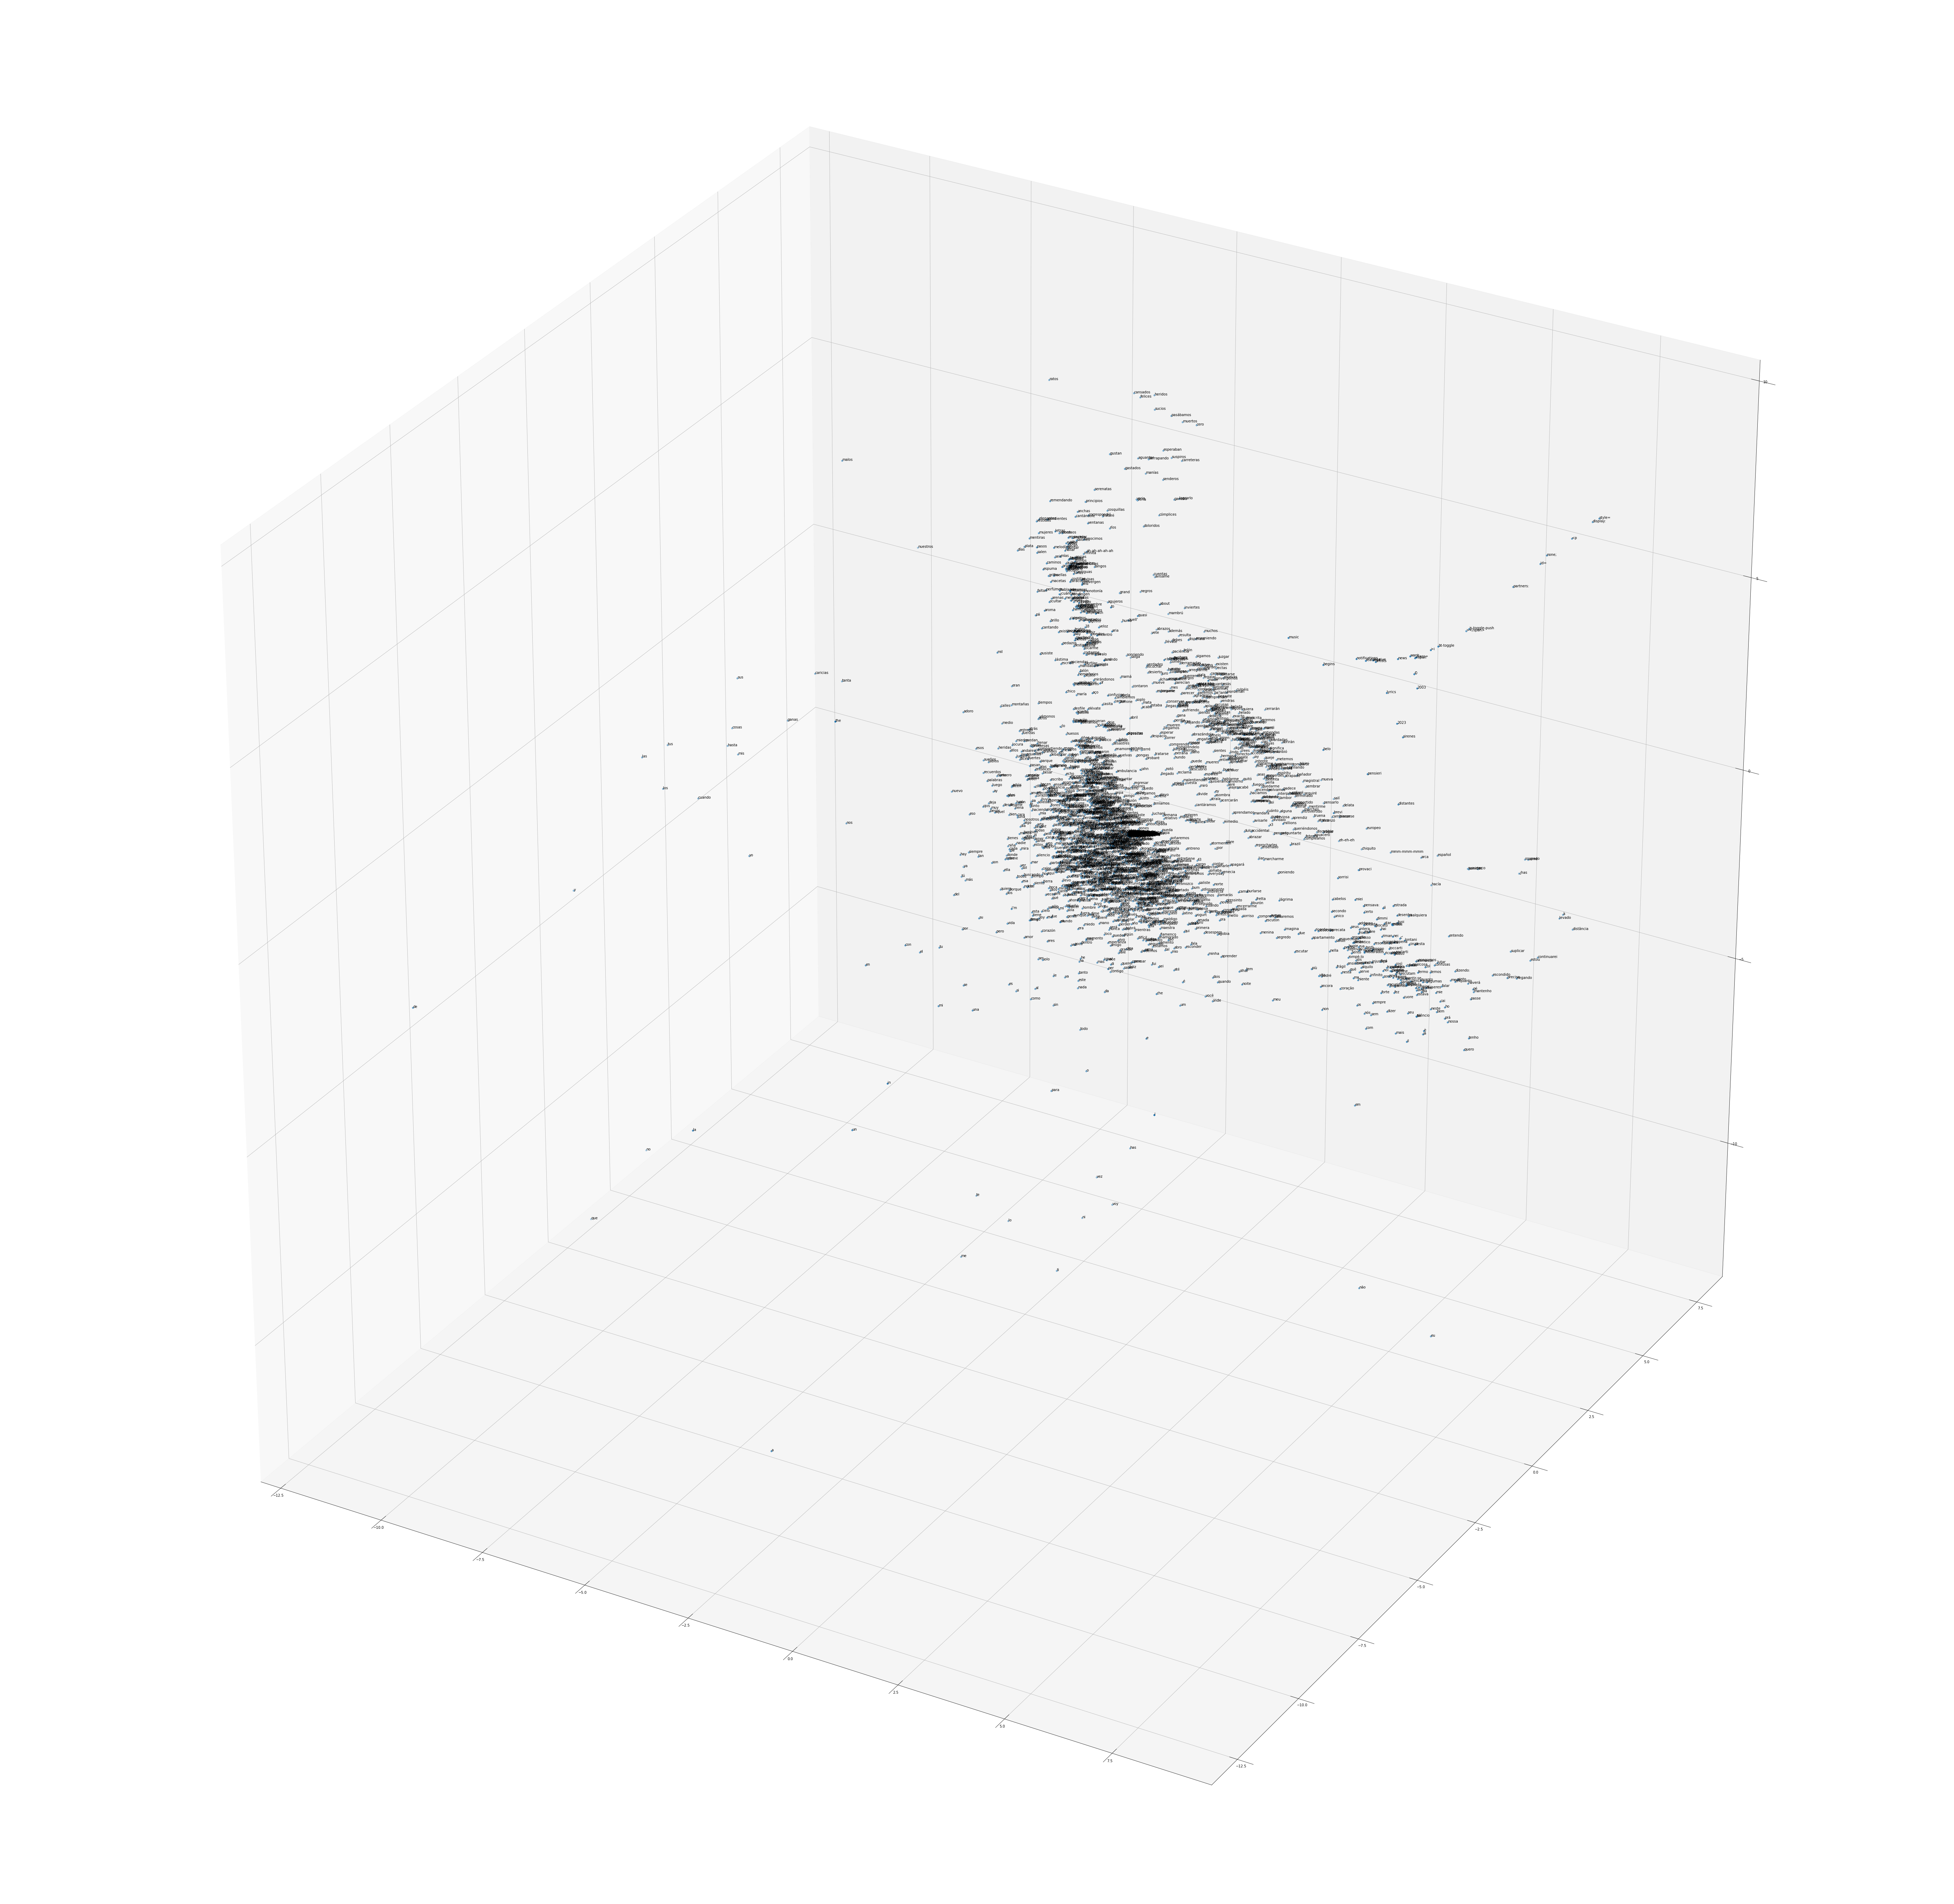

In [ ]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(projection='3d')

ma =  [k for k in embeds.keys()]
xs = [i[0] for i in embeds.values()]
ys = [i[1] for i in embeds.values()]
zs = [i[2] for i in embeds.values()]

ax.scatter(xs,ys,zs )

for m in ma:
    ax.text(embeds[m][0], embeds[m][1], embeds[m][2], m)



plt.show()

In [ ]:
print(data_set["entras"])

{'en', 'mambrú', 'cuando', 'un'}


In [ ]:
def sub_dic(keys,dic):
  sub = {}
  for k in keys:
    sub[k]=dic[k]
  return sub

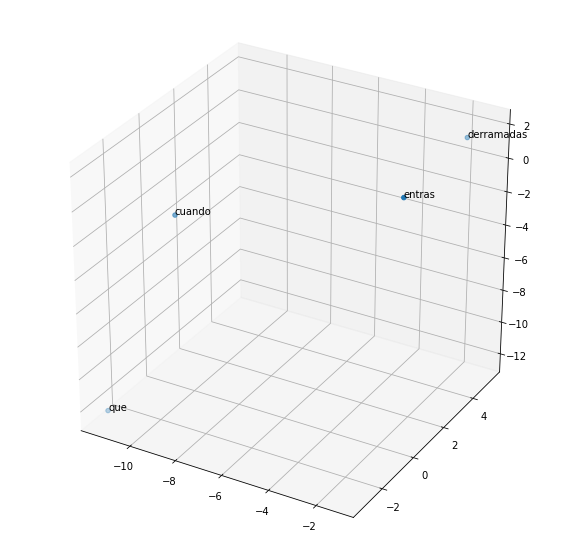

In [ ]:
sub = sub_dic(['que', 'entras', 'derramadas', 'cuando'],embeds)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ma =  [k for k in sub.keys()]
xs = [i[0] for i in sub.values()]
ys = [i[1] for i in sub.values()]
zs = [i[2] for i in sub.values()]

ax.scatter(xs,ys,zs,marker='o' )

for m in ma:
    ax.text(sub[m][0], sub[m][1], sub[m][2], m)



plt.show()

In [ ]:
new_historic={k: v for k, v in sorted(historic.items(), key=lambda item: item[1])[len(historic.items())-70:len(historic.items()):]}
#new_historic

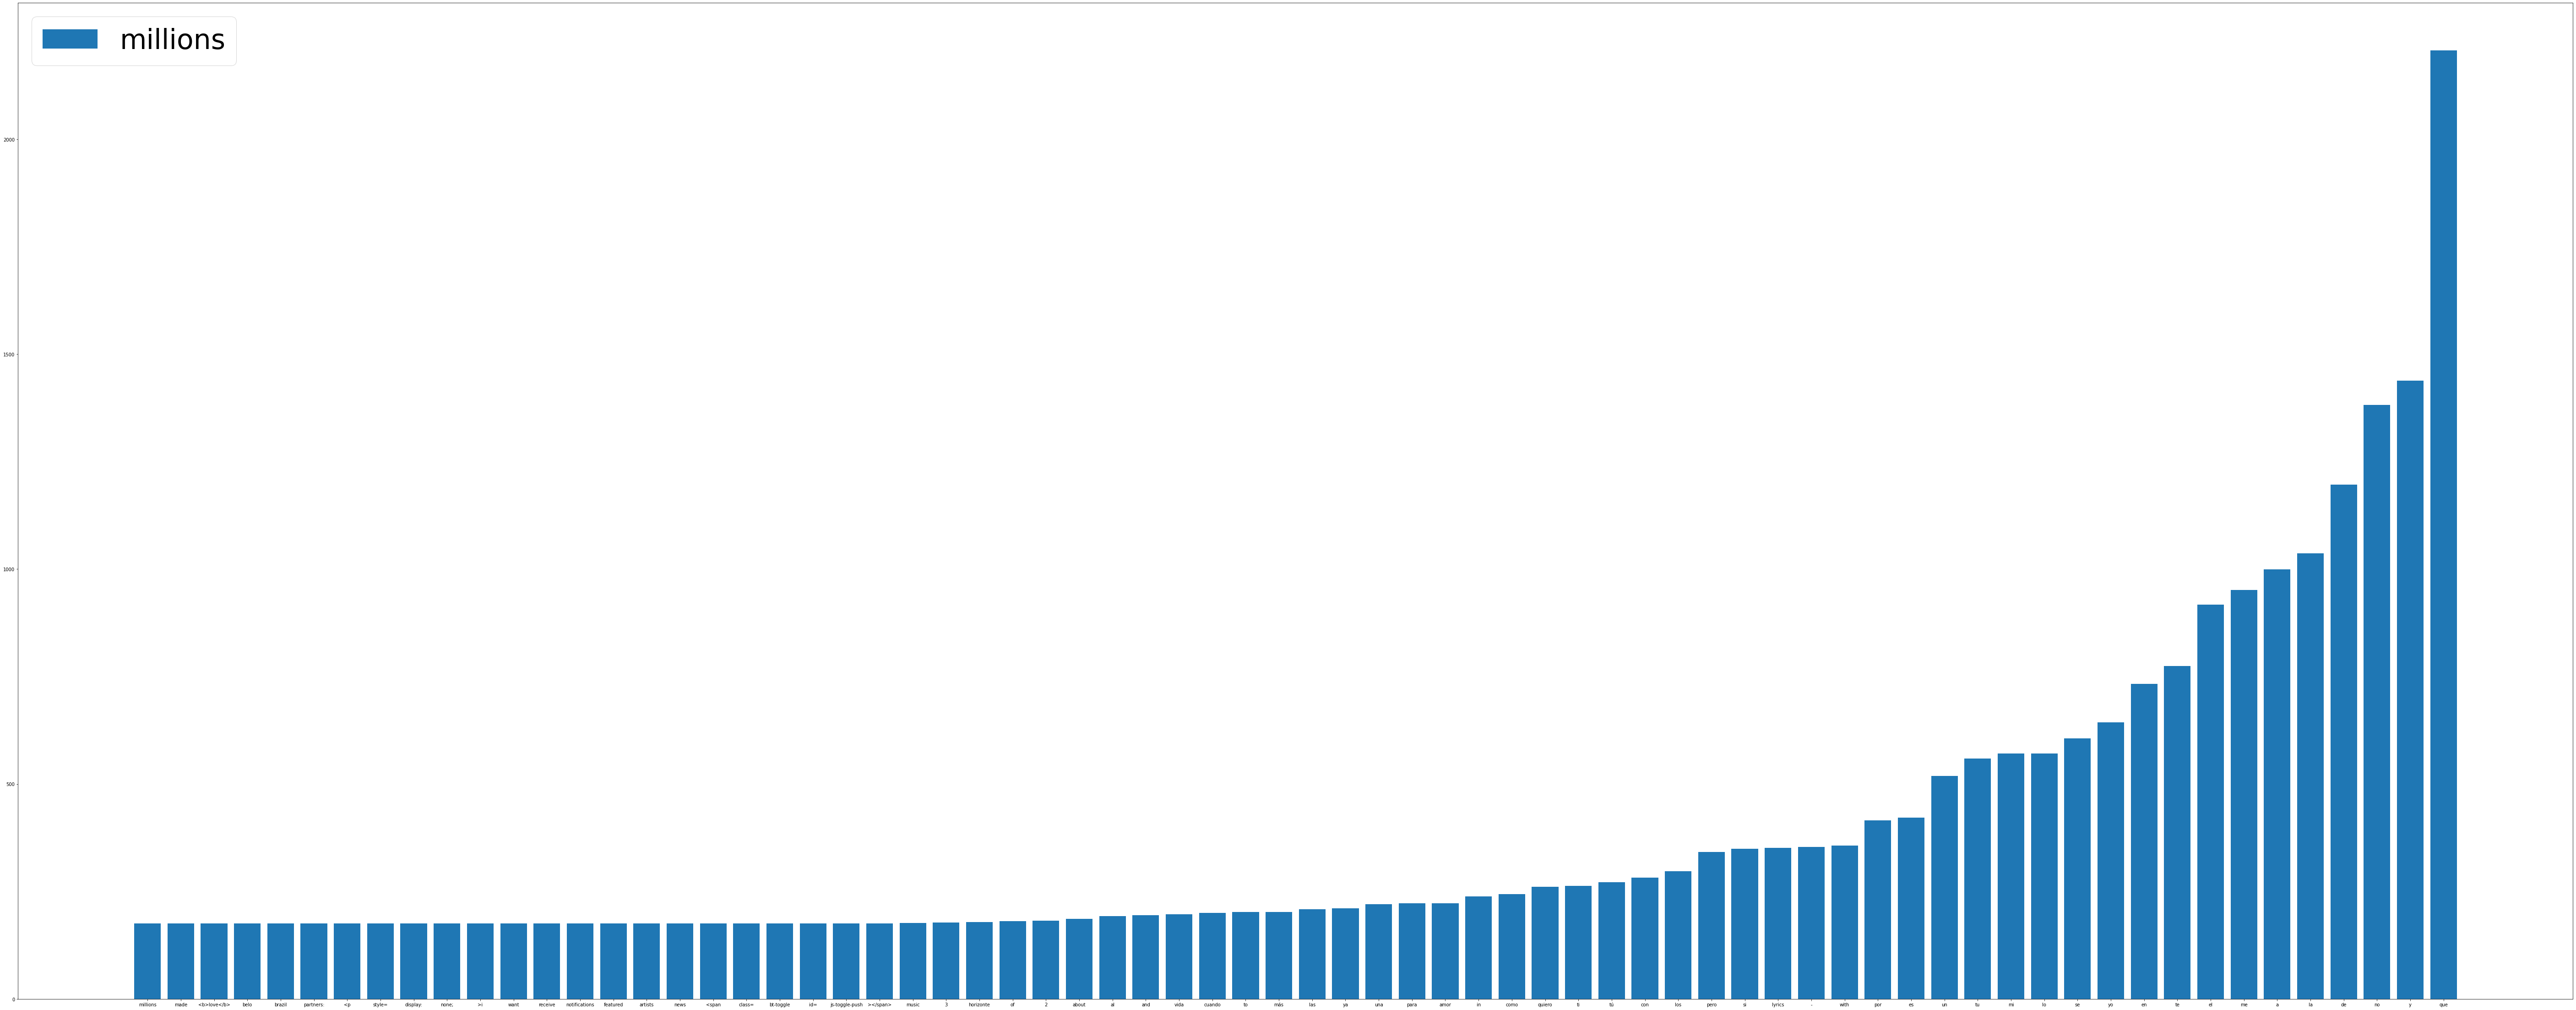

In [ ]:

plt.figure(figsize=(100,40))
plt.bar(*zip(*new_historic.items()))
plt.legend(new_historic.keys(),fontsize=60)
plt.show()

[176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 177, 178, 179, 181, 182, 186, 193, 195, 197, 200, 202, 202, 209, 211, 220, 222, 223, 239, 244, 261, 263, 272, 282, 297, 342, 349, 352, 354, 357, 415, 422, 519, 559, 571, 571, 606, 644, 733, 775, 917, 951, 999, 1037, 1197, 1382, 1439, 2207] ['millions', 'made', '<b>love</b>', 'belo', 'brazil', 'partners:', '<p', 'style=', 'display:', 'none;', '>i', 'want', 'receive', 'notifications', 'featured', 'artists', 'news', '<span', 'class=', 'bt-toggle', 'id=', 'js-toggle-push', '></span>', 'music', '3', 'horizonte', 'of', '2', 'about', 'al', 'and', 'vida', 'cuando', 'to', 'más', 'las', 'ya', 'una', 'para', 'amor', 'in', 'como', 'quiero', 'ti', 'tú', 'con', 'los', 'pero', 'si', 'lyrics', '-', 'with', 'por', 'es', 'un', 'tu', 'mi', 'lo', 'se', 'yo', 'en', 'te', 'el', 'me', 'a', 'la', 'de', 'no', 'y', 'que']


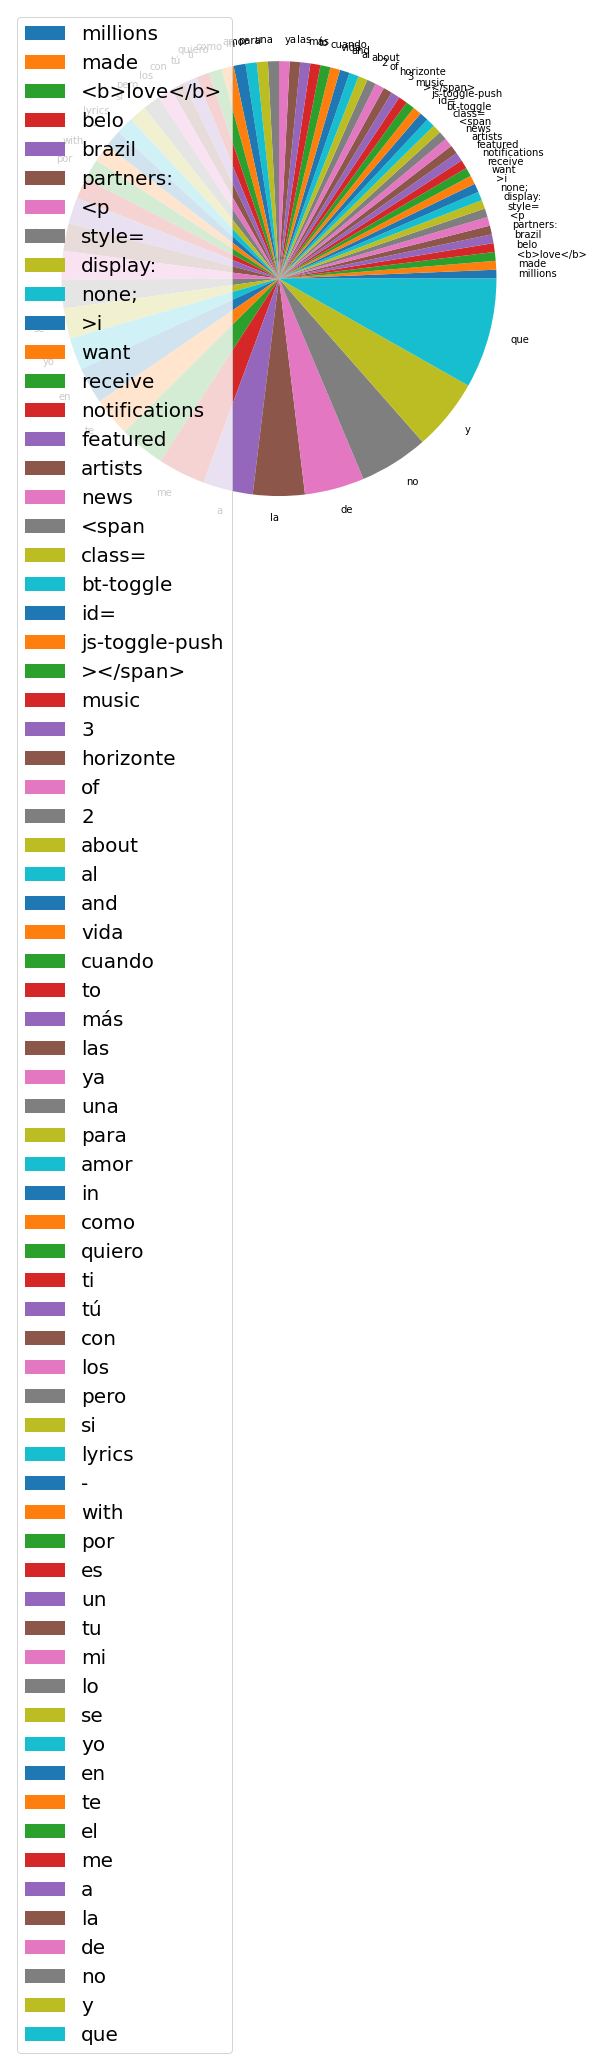

In [ ]:
y=[]
x=[]
for t in new_historic.items():
  x.append(t[0])
  y.append(t[1])
print(y,x)
plt.figure(figsize=(50,10))
plt.pie(y,labels=x)
plt.legend(new_historic.keys(),fontsize=20)
plt.show()